# A Different Way To Understand And Analyze The Stackoverflow Data

In this stackoverflow data of 2019, i will be answering three questions based on the visualization of data, which is pretty interesting. Here i will analyze developer's data, as there are most rows are of developers as a profession and very less student as learning to code. Taking the data of the respondents who code as hobby and those who are developers  


Questions:

* From which country how many respondent code as their hobby get employed ?
* How many Respondent who earn bachelor's, master's and doctoral degree are career satisfied ?
* Does hobby really matter for getting good salary ?

***

## Data Understanding And Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv('survey_results_public.csv')

In [33]:
data

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [34]:
data.head(100)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [8]:
# Filtering the data and saving it in different form dev_data
dev_data = data[data['MainBranch'].str.contains("I am a developer by profession") == True]
code_hobby = data[data['MainBranch'].str.contains("I code primarily as a hobby") == True]

# Filling N/A column with the mode
dev_data['CareerSat'] = dev_data['CareerSat'].fillna(dev_data['CareerSat'].mode()[0])

# Filling N/A values in WorkWeekHrs column with the mean of each country
work_week_hrs = dev_data.groupby('Country')['WorkWeekHrs'].mean()
dev_data['WorkWeekHrs'] = dev_data.apply(lambda x: work_week_hrs[x['Country']] if pd.isnull(x['WorkWeekHrs']) else x['WorkWeekHrs'], axis=1)
dev_data = dev_data.dropna(subset=['WorkWeekHrs'])



# Set the CareerSat and Employment column into categorical data type so it will be sorted with the right order (ordinal data)
dev_data['CareerSat'] = pd.Categorical(dev_data['CareerSat'], categories=['Very dissatisfied',
                                                                          'Slightly dissatisfied',
                                                                          'Neither satisfied nor dissatisfied',
                                                                          'Slightly satisfied',
                                                                          'Very satisfied'], ordered=True)

code_hobby['Employment'] = pd.Categorical(code_hobby['Employment'], categories=['Not employed, and not looking for work',
                                                                            'Employed full-time',
                                                                            'Employed part-time',
                                                                            'Independent contractor, freelancer, or self-employed'], ordered=True)                                         

For setting up the data preparation i followed some of the steps for missing values and for categorical values are as follows
1. First filter the data as per your opinion, as i have filtered for developers.
2. Those column which have null value is fill with highest value in column i.e using mode.
3. Filling the workweekhrs column with mean and will be groupby country.
4. Categorical data is categorized in specific order.


## Data Exploration

**1. From which country how many respondent code as their hobby get employed ?**

* First filtering the first 20 countries,
* Now, aggregating the data 
* Then add the column to get the data for percentage


In [16]:
# Data Exploration 

# Taking the survey and filtering the data of 20 countries 
country_list = list(code_hobby['Country'].value_counts().head(20).index)
filter_code_hobby_data = code_hobby[code_hobby['Country'].isin(country_top)]

# Once the data is taken, it neeeds to be aggregated
agg_data = filter_code_hobby_data.groupby(['Country','Employment'], as_index=False)['Respondent'].count()


# For getting the data into percentage adding new column
total_respondents_per_country = filter_code_hobby_data['Country'].value_counts()

agg_data['Respondent Percentage'] = agg_data \
                                    .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                    .round(3)

# Pivot the data
agg_data = agg_data[['Country', 'Employment', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(agg_data, values='Respondent Percentage', index='Country', columns='Employment') \
                 .sort_values('Employed full-time', ascending=False)

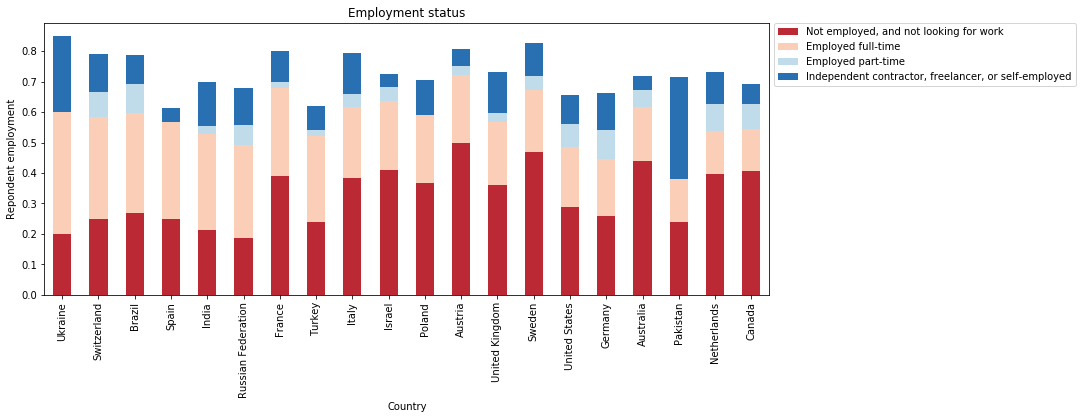

In [17]:
# Data visualization
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("RdBu", n_colors=7)),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Repondent employment')
plt.title('Employment status')
plt.show()

**Ukraine is the first country** which has **full employment status** while countries like Switzerland which lands **2nd** in the list. As Canada is last country among first 20 countries, in Canada the percentage is quite low. 

****

**2. How many Respondent who earn bachelor's,master's and doctoral degree are career satisfied?**

We have to separate out respondents with bachelors, masters and doctoral degree and other degree which are primary or secondary school or from some college degree

In [29]:
# Create a new columns to flag each respondent if their major is related or not
def edu_level(value):
    
    if value == 'Bachelorâ€™s degree (BA, BS, B.Eng., etc.)' \
    or value == 'Masterâ€™s degree (MA, MS, M.Eng., MBA, etc.)' \
    or value == 'Other doctoral degree (Ph.D, Ed.D., etc.)':
        return 'Bachelor, masters and doctoral degree'
    return 'Other'

dev_data['Degree'] = dev_data['EdLevel'].apply(edu_level)

dev_data['Degree'].value_counts(normalize=True)

Other                                    0.977646
Bachelor, masters and doctoral degree    0.022354
Name: Degree, dtype: float64

In [31]:
# Aggregate the data so we know how many respondents who earn bachelors, masters and doctoral degree
aggregate = dev_data.groupby(['Degree','CareerSat'], as_index=False)['Respondent'].count()

# For Percentage
res_per_degree = dev_data['Degree'].value_counts()

aggregate['Respondent Percentage'] = aggregate \
                                           .apply(lambda x: x['Respondent'] / res_per_degree[x['Degree']], axis=1) \
                                           .round(4)

# Pivot the data
aggregate = aggregate[['Degree', 'CareerSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregate, values='Respondent Percentage', index='Degree', columns='CareerSat')

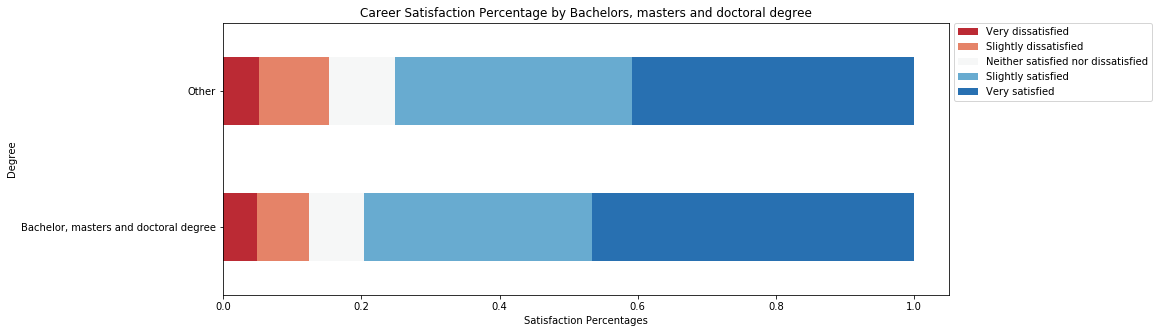

In [32]:
# Visualizing the data
pivoted_data.plot(kind='barh', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("RdBu", n_colors=7)),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.xlabel('Satisfaction Percentages')
plt.title('Career Satisfaction Percentage by Bachelors, masters and doctoral degree')
plt.show()

**From above, bachelors, masters and doctoral degree respondants are very satisfied as compared to other**

In [33]:
pivoted_data

CareerSat,Very dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Very satisfied
Degree,,,,,
"Bachelor, masters and doctoral degree",0.0484,0.0763,0.0790,0.3304,0.4659
Other,0.0512,0.1021,0.0956,0.3425,0.4086


Respondants with **Degree 46% are career satisfied** while **other are 40% satisfied**. From this it is clear that repondents who have earn degree are very much satisfied with their career 
****

**3. Does hobby really matter to get good salary ?**

In [38]:
# Aggregate the data
Hobbyist_per_category = dev_data.groupby('Hobbyist', as_index=False)['ConvertedComp'].mean()

Hobbyist_per_category

,Hobbyist,ConvertedComp
0,No,126936.181391
1,Yes,127026.971747


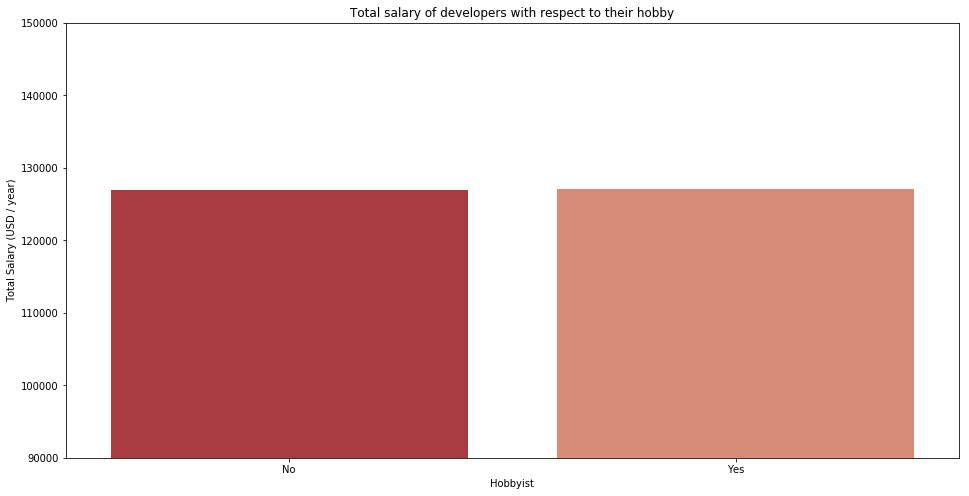

In [45]:
plt.figure(figsize=(16, 8))
sns.barplot(data=Hobbyist_per_category, x='Hobbyist', y='ConvertedComp', palette=sns.color_palette("RdBu", n_colors=7))
plt.ylim(90000,150000)
plt.title('Total salary of developers with respect to their hobby')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Hobbyist')
plt.show()

As developers with hobby have slightly more salary which is 0.07% more salary than those with no hobby.

The main relation between hobby and salary is that someone who is skillful and have some hobby it does not impact much but it is good to have hobby. Most developers who have hobby feel less pressure and will be confident enough to face the difficult situation.

****

### Conclusion
In this notebook we did the analysis about developers from Stack Overflow Survey Data 2019, and these are the summary of what we have done.

**1. From which country how many respondent code as their hobby get employed ?**
* **Ukraine is the first country** which has **highest employment status with full employment status** while countries like Switzerland which lands **2nd** in the list. As Canada is last country among first 20 countries, in Canada the percentage is quite low. 

**2. How many Respondent who earn bachelor's, master's and doctoral degree are career satisfied ?**
* Respondants with **Degree 46% are career satisfied** while **other are 40% satisfied**. From this it is clear that repondents who have earn degree are very much satisfied with their career 

**3. Does hobby really matter for getting good salary ?**
* As developers with hobby have slightly more salary which is **0.07%** more salary than those with no hobby.
